In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
transforms = transforms.ToTensor()

In [3]:
# load data
mnist_data = datasets.MNIST(root='./data',
                            train=True,
                            download=True,
                            transform=transforms)

# data loader
data_loader = DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)

In [4]:
# N = batch size
class Autoencoder(nn.Module):
    def __init__(self):
        '''
        Sisi kiri : encoder
        Ukuranoutput akan semakin mengecil
        nn.Conv2d
        '''
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # N, 1, 28, 28
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7), # N, 64, 1, 1
        )

        '''
        Sisi kanan : decoder
        Ukuran output akan semakin membesar
        nn.ConvTranspose2d
        '''
        self.decoder = nn.Sequential(
            # N, 64, 1, 1
            nn.ConvTranspose2d(64, 32, 7), # N, 32, 7, 7 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28
            nn.Sigmoid() 
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

In [5]:
model = Autoencoder()

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.00001)

In [6]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

In [8]:
epochs = 10
outputs = []

for epoch in range(epochs):
    for (img, _) in data_loader:
        img = img.to(device)
        # jadikan input menjadi 1D (flatten)

        recon = model(img)

        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch : { epoch + 1}, Loss : {loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch : 1, Loss : 0.0089
Epoch : 2, Loss : 0.0065
Epoch : 3, Loss : 0.0040
Epoch : 4, Loss : 0.0033
Epoch : 5, Loss : 0.0033
Epoch : 6, Loss : 0.0028
Epoch : 7, Loss : 0.0030
Epoch : 8, Loss : 0.0028
Epoch : 9, Loss : 0.0030
Epoch : 10, Loss : 0.0027


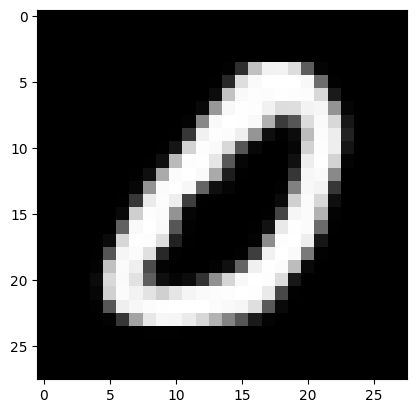

In [10]:
plt.imshow(recon[0].view(28, 28).cpu().detach().numpy(), cmap='gray')

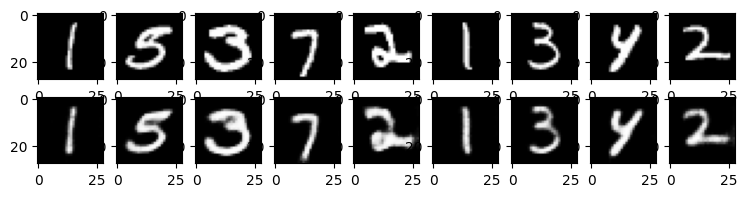

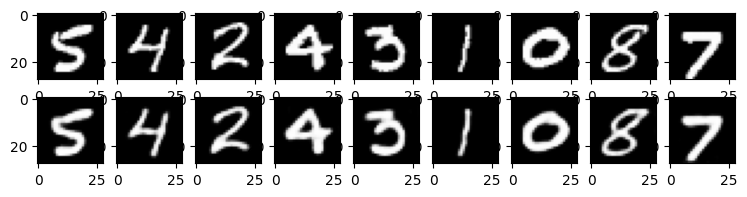

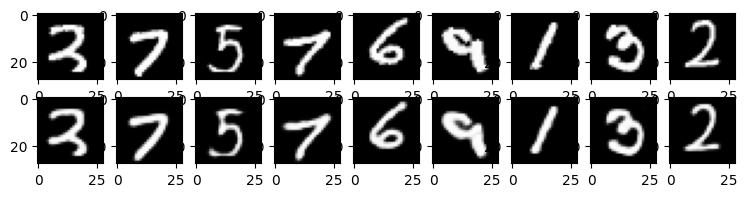

In [11]:
for k in range(0, epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()

    # detach and convert to numpy
    imgs = outputs[k][1].cpu().detach().numpy()
    recon = outputs[k][2].cpu().detach().numpy()

    # original images
    for i, item in enumerate(imgs):
        if i >= 9 : break
        plt.subplot(2, 9, i + 1)
        item = item.reshape(-1, 28, 28)

        plt.imshow(item[0])

    # reconstructed images
    for i, item in enumerate(recon):
        if i >= 9 : break
        plt.subplot(2, 9, i + 10)
        item = item.reshape(-1, 28, 28)

        plt.imshow(item[0])